# Making Single Strand DNA Models
*It is recommended that you run this example inside a Jupyter environment*
*rather than a VSCode or similar environment*

This requires the mayavi jupyter extension
`jupyter nbextension install --py mayavi --user`

In [1]:
import sys
from pathlib import Path

try:
    from fractaldna.dna_models import dnachain as dna
except (ImportError, ModuleNotFoundError):
    # Path modifications if working straight out of the git repo.
    sys.path.append(str(Path.cwd().parent.parent.parent))
    from fractaldna.dna_models import dnachain as dna

from mayavi import mlab

# Disable this option for interactive rendering
mlab.options.offscreen = True

# Enable this option for an interactive notebook
# mlab.init_notebook()

## Making and plotting a single DNA strand

Text(0.5, 0.92, 'Surface Plot')

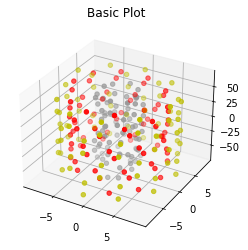

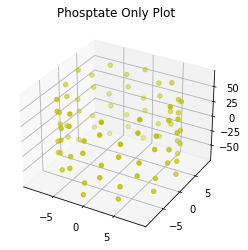

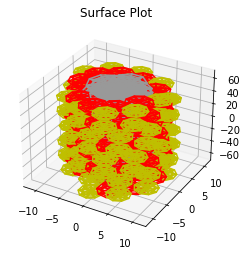

In [2]:
# Make a 40 base pair long DNA Strand
chain = dna.DNAChain("GTAC" * 10)
# Generate a simple Matplotlib visualisation
# The basic plot shows each molecule as a point
plot = chain.to_plot()
plot.gca().set_title("Basic Plot")

# You can also hide certain molecules (b = base, s=sugar, p=phosphate)
plot_phosphate = chain.to_plot(plot_b=False, plot_s=False, plot_p=True)
plot_phosphate.gca().set_title("Phosptate Only Plot")

# The surface plot plots each DNA molecule as a ball
plot_surface = chain.to_surface_plot()
plot_surface.gca().set_title("Surface Plot")

## Generating pretty plots with MayaVI

In [3]:
# MayaVI can generate nicer plots, joining the strands together
plot = chain.to_strand_plot()
plot.scene.save_jpg("single_strand_strand_plot.jpg")

![single_strand_strand_plot](single_strand_strand_plot.jpg)

In [4]:
# Or you can just plot the path of the entire block of dna, which looks better for a curved chain
chain = dna.TurnedDNAChain("GATC" * 40)
plot = chain.to_line_plot()
plot.scene.save_jpg("single_turned_strand_line_plot.jpg")

![single_turned_strand_line_plot](single_turned_strand_line_plot.jpg)

In [5]:
plot = chain.to_strand_plot()
plot.scene.save_jpg("single_turned_strand_strand_plot.jpg")

![single_turned_strand_strand_plot](single_turned_strand_strand_plot.jpg)

## Exporting a DNA strand as text

In [6]:
# The chain can be converted to a text stream for saving
print(chain.to_text()[:1000], "...")

#NAME SHAPE CHAIN_ID STRAND_ID BP_INDEX SIZE_X SIZE_Y SIZE_Z POS_X POS_Y POS_Z ROT_X ROT_Y ROT_Z
Phosphate sphere 0 0 0 2.2823538668497223 2.2823538668497223 2.2823538668497223 -0.779890171626023 8.815584979134911 -333.92471210406507 0.0 -0.0 0.0
Sugar sphere 0 0 0 2.632139825596463 2.632139825596463 2.632139825596463 2.2598223909714656 6.737434473918255 -334.824704023257 0.0 -0.0 0.0
Guanine ellipse 0 0 0 3.6315030254147858 3.799953276546786 1.8872880374815397 0.6081393104497743 2.3215301459187865 -335.84706382820303 0.0 -0.0 0.0
Phosphate sphere 0 1 0 2.2823538668497223 2.2823538668497223 2.2823538668497223 -0.779890171626023 -8.815584979134911 -338.19297877073177 0.0 -0.0 0.0
Sugar sphere 0 1 0 2.632139825596463 2.632139825596463 2.632139825596463 2.2598223909714656 -6.737434473918255 -337.2929868515398 0.0 -0.0 0.0
Cytosine ellipse 0 1 0 3.597341307934331 3.066331331321459 1.7793608554794114 0.035998166959542686 -3.3433274569807168 -336.3976643350362 0.0 -0.0 0.0
Phosphate sphere 0

In [7]:
# Or a DataFrame
chain.to_frame()

,name,shape,chain_idx,strand_idx,bp_idx,size_x,size_y,size_z,pos_x,pos_y,pos_z,rot_x,rot_y,rot_z
0,Phosphate,sphere,0,0,0,2.282354,2.282354,2.282354,-0.779890,8.815585,-333.924712,0.000000,-0.000000,0.000000
1,Sugar,sphere,0,0,0,2.632140,2.632140,2.632140,2.259822,6.737434,-334.824704,0.000000,-0.000000,0.000000
2,Guanine,ellipse,0,0,0,3.631503,3.799953,1.887288,0.608139,2.321530,-335.847064,0.000000,-0.000000,0.000000
3,Phosphate,sphere,0,1,0,2.282354,2.282354,2.282354,-0.779890,-8.815585,-338.192979,0.000000,-0.000000,0.000000
4,Sugar,sphere,0,1,0,2.632140,2.632140,2.632140,2.259822,-6.737434,-337.292987,0.000000,-0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,Sugar,sphere,0,0,159,2.632140,2.632140,2.632140,337.292987,5.809905,4.092044,1.570796,0.633555,1.570796
2,Cytosine,ellipse,0,0,159,3.597341,3.066331,1.779361,336.397664,2.008306,2.673171,1.570796,0.633555,1.570796
3,Phosphate,sphere,0,1,159,2.282354,2.282354,2.282354,333.924712,-5.847478,-6.643024,1.570796,0.633555,1.570796
4,Sugar,sphere,0,1,159,2.632140,2.632140,2.632140,334.824704,-2.167395,-6.767734,1.570796,0.633555,1.570796
